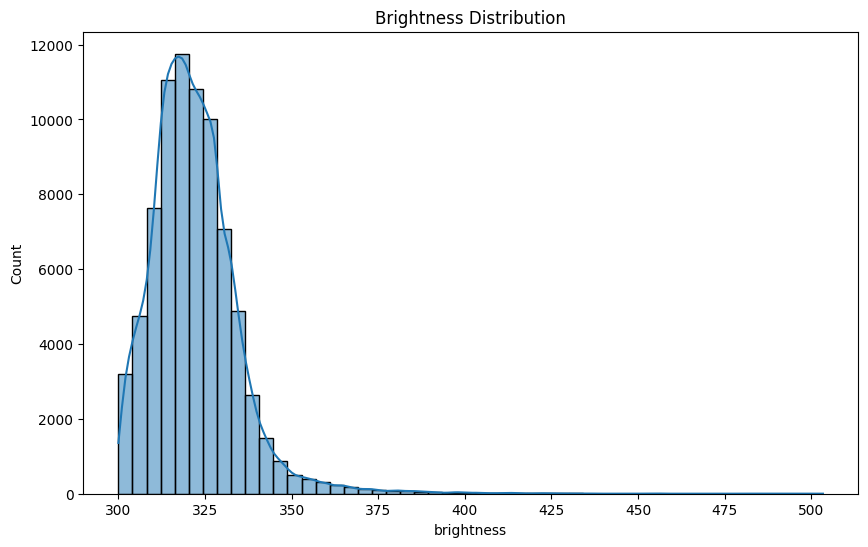

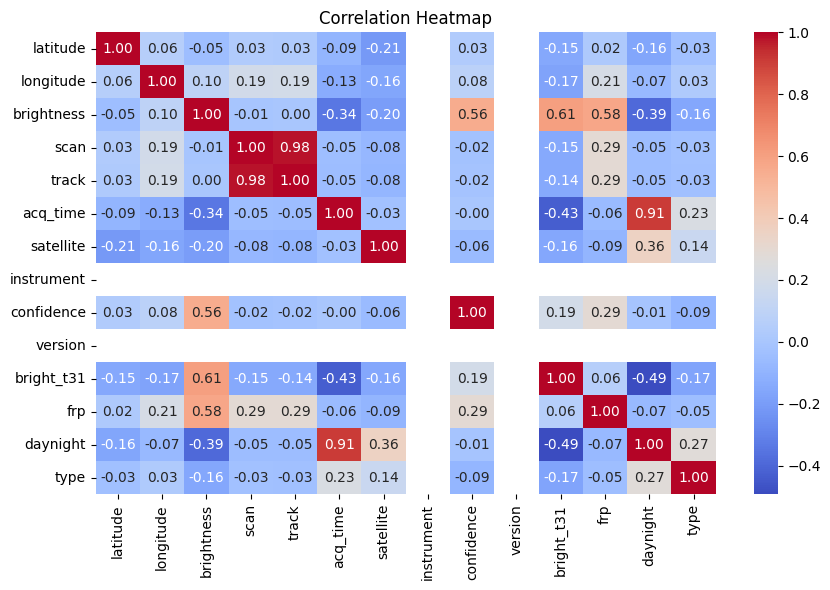

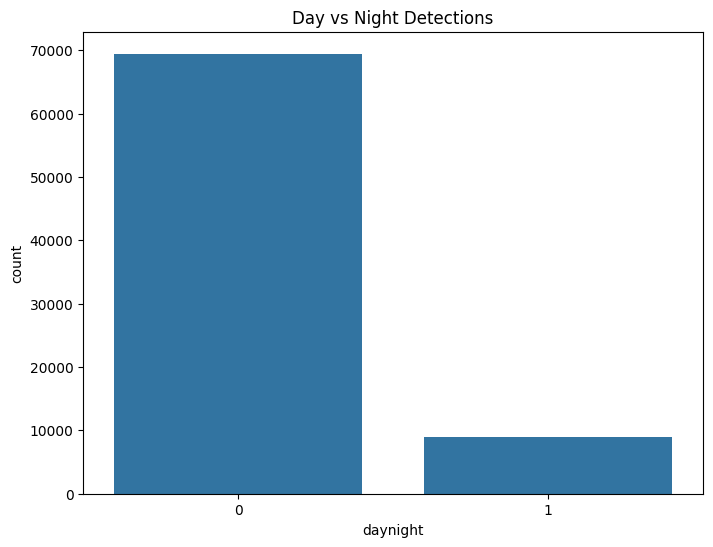

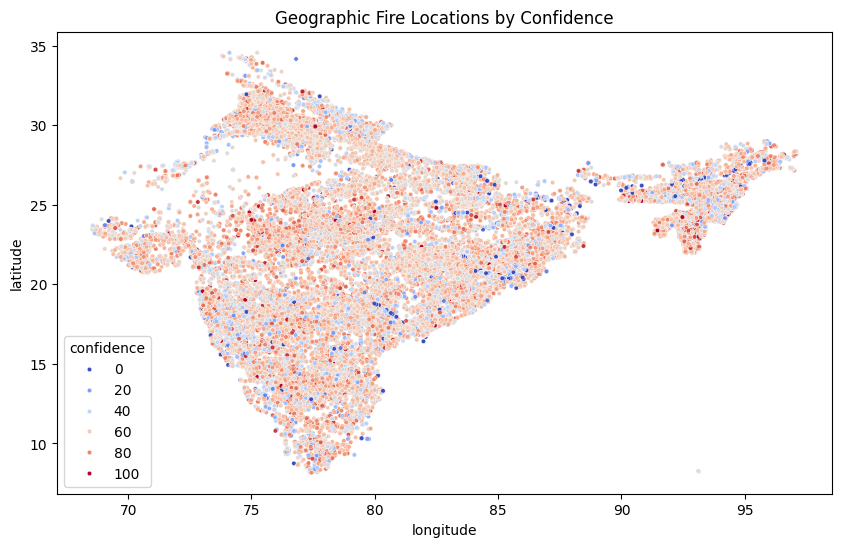

               Model  R2 Score        MAE         MSE
0  Linear Regression  0.396899  10.369989  194.247145
1      Random Forest  0.636556   7.285945  117.058303


In [3]:
# 🔥 Fire Detection Full Pipeline in One Cell

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load dataset
df = pd.read_csv("/a04662ab156537051550 (1).csv")
df['acq_date'] = pd.to_datetime(df['acq_date'])

# Encode categorical variables
label_encoders = {}
for col in ['satellite', 'instrument', 'daynight']:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Drop missing values
df.dropna(inplace=True)

# Visualization
plt.figure(figsize=(10, 6))
sns.histplot(df['brightness'], bins=50, kde=True)
plt.title("Brightness Distribution")
plt.show()

plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

plt.figure(figsize=(8, 6))
sns.countplot(x='daynight', data=df)
plt.title("Day vs Night Detections")
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(x='longitude', y='latitude', hue='confidence', data=df, palette='coolwarm', s=10)
plt.title("Geographic Fire Locations by Confidence")
plt.show()

# Machine Learning
X = df.drop(columns=['confidence', 'acq_date'])
y = df['confidence']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

# Random Forest
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test) # Fix: Predict on X_test instead of y_train

# Evaluation
def evaluate(name, y_true, y_pred):
    return {
        'Model': name,
        'R2 Score': r2_score(y_true, y_pred),
        'MAE': mean_absolute_error(y_true, y_pred),
        'MSE': mean_squared_error(y_true, y_pred)
    }

results = [
    evaluate("Linear Regression", y_test, y_pred_lr),
    evaluate("Random Forest", y_test, y_pred_rf)
]

results_df = pd.DataFrame(results)
print(results_df)